In [3]:
# We execute esda(exploratory spatial data analyis

In [35]:
# Load libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")

import plotly.express as px
import plotly.graph_objects as go

import geopandas as gpd


import libpysal as ps
from libpysal  import weights
from libpysal.weights import Queen

import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights

from giddy.directional import Rose

import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

from spreg import OLS
from spreg import MoranRes
from spreg import ML_Lag
from spreg import ML_Error 

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

import warnings
warnings.filterwarnings('ignore') 
import time

In [19]:
target_df = pd.read_csv('concat_df.csv', index_col=0)
target_df.columns

Index(['pnu', 'rlgnm', 'rlgcd', 'sigungunm', 'lawdongnm', 'linm', 'bun', 'ji',
       'naroadnm', 'naroadcd', 'namainbun', 'nasubbun', 'platplc',
       'newplatplc', 'x', 'y', 'bdnm', 'mainpurpscd', 'mainpurpscdnm',
       'etcpurps', 'platarea', 'archarea', 'bcrat', 'totarea', 'vlrat', 'heit',
       'grndflrcnt', 'ugrndflrcnt', 'rideuseelvtcnt', 'emgenuseelvtcnt',
       'useaprday', 'jijigucdnm', 'sigungucd', '2019', '2020', '2021', '2022',
       'x_5179', 'y_5179', 'geometry', 'index_right', 'idx', 'ADM_SECT_C',
       'geometry_grids'],
      dtype='object')

In [43]:
ref_col = ['bdnm', 'platplc']
geo_col = ['pnu', 'x', 'y', 'x_5179', 'y_5179', 'geometry', 'idx', 'ADM_SECT_C', 'geometry_grids']
var_col = ['mainpurpscd','platarea','archarea','bcrat','totarea','vlrat','heit','grndflrcnt','ugrndflrcnt','rideuseelvtcnt','emgenuseelvtcnt','useaprday', '2019', '2020', '2021', '2022']
target_df = target_df[ref_col + geo_col + var_col]

In [44]:
grid_based = target_df[geo_col + var_col].groupby(['ADM_SECT_C', 'idx', 'geometry_grids']).mean()
grid_based = grid_based.reset_index()
gdf = gpd.GeoDataFrame(grid_based, geometry='geometry_grids')

TypeError: Input must be valid geometry objects: POLYGON ((951835.230213883 1956865.54807064, 951835.230213883 1956965.54807064, 951935.230213883 1956965.54807064, 951935.230213883 1956865.54807064, 951835.230213883 1956865.54807064))

TypeError: Input must be valid geometry objects: POLYGON ((951835.230213883 1956865.54807064, 951835.230213883 1956965.54807064, 951935.230213883 1956965.54807064, 951935.230213883 1956865.54807064, 951835.230213883 1956865.54807064))

AttributeError: 'DataFrame' object has no attribute 'centroid'

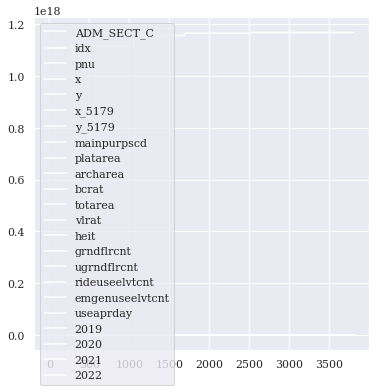

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(color = 'white', edgecolor = 'black', ax = ax)
gdf.centroid.plot(ax=ax)
ax.set_title('Map of Georgia and centroids', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()